In [1]:
# data reading and processing

In [2]:
# import math and numpy first
import pandas as pd
import numpy as np
import scipy
import re
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix , precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification

/scratch/knerr/venvs/cs66/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
# read in file
data=pd.read_csv('mbti_1.csv')
data.head()

data[0:10]

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [4]:
# basic stats about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8674 entries, 0 to 8673
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8674 non-null   object
 1   posts   8674 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
# basic stats about each column
data.describe()

,type,posts
count,8674,8674
unique,16,8674
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [6]:
# array of each of the mbti types
mbti_types = data['type'].unique()

# get counts for each of the mbti types
data['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     684
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

Text(0.5, 0, 'MBTI Types')

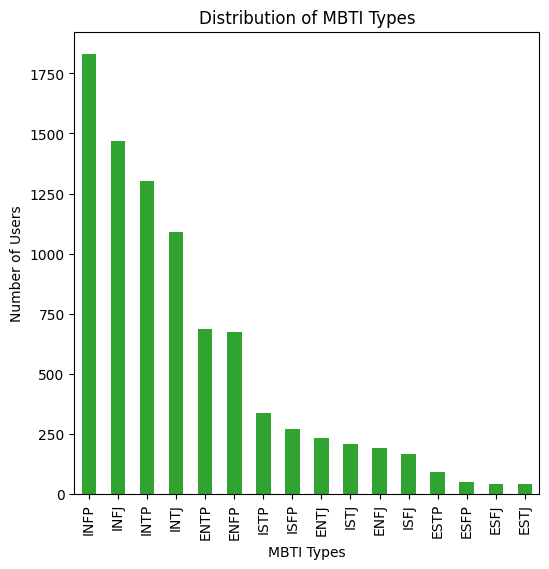

In [7]:
# understanding makeup of dataset in graphical form
data['type'].value_counts().plot(kind="bar", figsize=(6,6),color = (0.1,0.6,0.1,0.9))
plt.title("Distribution of MBTI Types")
plt.ylabel("Number of Users")
plt.xlabel("MBTI Types")

Text(0.5, 0, 'Number of Words per Post')

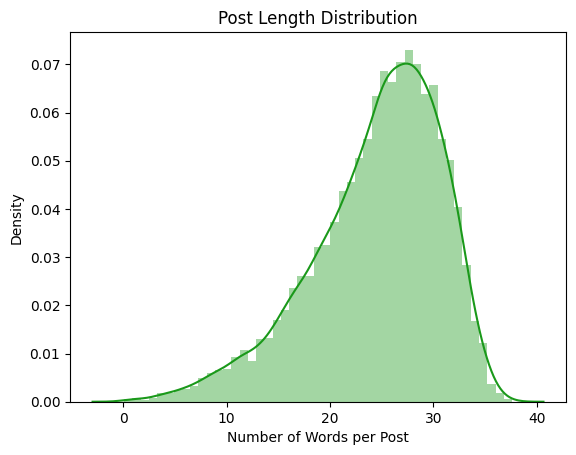

In [8]:
# graphical representation of the distribution of the number of words in all posts
data['posts'].apply(len)

sns.distplot(data['posts'].apply(lambda x: len(x.split())/50),color = (0.1,0.6,0.1,0.9))
plt.title("Post Length Distribution")
plt.ylabel("Density")
plt.xlabel("Number of Words per Post")

Text(0.5, 0, 'Number of Words per 50 Posts')

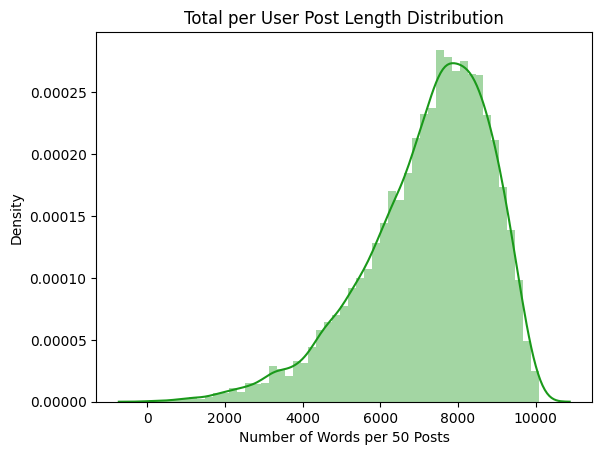

In [9]:
# graphical representation of the distribution of the lengths of the posts
data['posts'].apply(len)
sns.distplot(data['posts'].apply(len),color = (0.1,0.6,0.1,0.9))
plt.title("Total per User Post Length Distribution")
plt.ylabel("Density")
plt.xlabel("Number of Words per 50 Posts")

In [15]:
# Dataset cleaning - removing links, symbols, MBTI types and making lowercase
def text_cleaning(data):
    # removing links from text data
    data['posts'] = data['posts'].apply(lambda x: re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+'," ",x.replace("|"," ") + " "))
    
    # removing other symbols
    data['posts'] = data['posts'].apply(lambda x: re.sub('[^0-9a-z]'," ",x.replace("|"," ") + " "))
    
    # making all words lowercase
    data['posts'] = data['posts'].apply(lambda x: x.lower())
    
    # removing any mention of MBTI types
    for type in mbti_types:
        data['posts'] = data['posts'].str.replace(type.lower(),' ', regex=False)
    
text_cleaning(data)
print(data.head())

   type                                              posts
0  INFJ             and   moments     sportscenter not ...
1  ENTP     m finding the lack of me in these posts ver...
2  INTP    ood one               f course  to which   s...
3  INTJ    ear           enjoyed our conversation the o...
4  ENTJ    ou re fired     hat s another silly misconce...


In [17]:
X = CountVectorizer(stop_words = 'english').fit_transform(data["posts"])
data['type_num'] = LabelEncoder().fit_transform(data['type'])
y = data['type_num']

print(data.head())
print(y)
print(X.shape)

   type                                              posts  type_num
0  INFJ             and   moments     sportscenter not ...         8
1  ENTP     m finding the lack of me in these posts ver...         3
2  INTP    ood one               f course  to which   s...        11
3  INTJ    ear           enjoyed our conversation the o...        10
4  ENTJ    ou re fired     hat s another silly misconce...         2
0        8
1        3
2       11
3       10
4        2
        ..
8669    13
8670     1
8671    11
8672     9
8673     9
Name: type_num, Length: 8674, dtype: int64
(8674, 114765)


In [18]:
#SMOTE algorithm to handle class imbalance
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print("Before: " , counter)

#oversampling the train dataset using SMOTE
smt = SMOTE()

X, y = smt.fit_resample(X, y) 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, stratify=y, random_state=5)

counter = Counter(y)
print("After: " , counter)

Before:  Counter({9: 1832, 8: 1470, 11: 1304, 10: 1091, 3: 684, 1: 675, 15: 337, 13: 271, 2: 231, 14: 205, 0: 190, 12: 166, 7: 89, 5: 48, 4: 42, 6: 39})
After:  Counter({8: 1832, 3: 1832, 11: 1832, 10: 1832, 2: 1832, 0: 1832, 9: 1832, 1: 1832, 13: 1832, 15: 1832, 12: 1832, 14: 1832, 7: 1832, 5: 1832, 6: 1832, 4: 1832})


In [85]:
#linear support vector machine classifier using SGD training
svm = SGDClassifier(max_iter=20, tol=None)
svm.fit(X_train, y_train)
Y_prediction = svm.predict(X_test)
# svm.score(X_test, y_test)
acc_svm = round(svm.score(X_test, y_test) * 100, 2)
print(round(acc_svm,2,), "%")

80.35 %


In [86]:
# calculating precision and recall for svm

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.7934489334552597
0.7968581341313101
0.8033863447374673


In [21]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 100)
decision_tree.fit(X_train,y_train)

Y_prediction = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print(round(acc_decision_tree,2,), "%")

57.74 %


In [22]:
# calculating precision and recall for dt

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.5697050959588915
0.5734394613723521
0.5772915924210026


In [58]:
# Random Forest - ensemble of decision trees
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

76.36 %


In [59]:
# calculating precision and recall for rf

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.7610900805545007
0.764102722101638
0.7635034301496793


In [25]:
# Logistic Regression
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train, y_train)

Y_prediction = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, y_test) * 100, 2)
print(round(acc_log,2,), "%")

79.84 %


In [26]:
# calculating precision and recall for log reg

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.7985770231874049
0.7998056558254024
0.7983339272986458


In [27]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

Y_prediction = knn.predict(X_test)

acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print(round(acc_knn,6,), "%")

79.43 %


In [28]:
# calculating precision and recall for knn

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.7481880890135502
0.745062842582499
0.7941260542884296


In [29]:
#Naive Bayes
NB = MultinomialNB()
NB.fit(X_train.toarray(), y_train)
Y_prediction = NB.predict(X_test.toarray())
acc_nb = round(NB.score(X_test.toarray(), y_test) * 100, 2)
print(round(acc_nb,2,), "%")

71.96 %


In [30]:
# calculating precision and recall for nb

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.7187583151234801
0.7528040233198533
0.7196093935614161


In [87]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
%matplotlib inline
import matplotlib.pyplot as plt

def print_results(method, k_range, train_accuracy, test_accuracy):
    if method == "SVM":
        print("Iterations, Train Accuracy, Test Accuracy")
        for i in range(len(k_range)):
            print(k_range[i], str(f'{train_accuracy[i]:.3f}'), str(f'{test_accuracy[i]:.3f}'))
            
    elif method == "RF":
        print("Trees, Train Accuracy, Test Accuracy")
        for i in range(len(k_range)):
            print(k_range[i], str(f'{train_accuracy[i]:.3f}'), str(f'{test_accuracy[i]:.3f}'))
            
    elif method == "KNN":
        print("Neighbors, Train Accuracy, Test Accuracy")
        for i in range(len(k_range)):
            print(k_range[i], str(f'{train_accuracy[i]:.3f}'), str(f'{test_accuracy[i]:.3f}'))
            
def plot_data(method, k_range, train_accuracy, test_accuracy): 
    if method == "SVM":
        plt.title("SVM Validation Curve", fontsize="xx-large")
        plt.xlabel("max_iter",fontsize="large")
        plt.ylabel("Accuracy",fontsize="large")
        plt.ylim(0.0, 1.1)
        plt.xticks(k_range)

        plt.plot(k_range, train_accuracy, label="Training score", color="darkorange")
        plt.plot(k_range, test_accuracy, label="Cross-validation score", color="navy")

        plt.legend(loc="best")
        plt.show()
        
    elif method == "RF":
        plt.title("Random Forest Validation Curve", fontsize="xx-large")
        plt.xlabel("n_estimators",fontsize="large")
        plt.ylabel("Accuracy",fontsize="large")
        plt.ylim(0.0, 1.1)
        plt.xticks(k_range)

        plt.plot(k_range, train_accuracy, label="Training score", color="darkorange")
        plt.plot(k_range, test_accuracy, label="Cross-validation score", color="navy")

        plt.legend(loc="best")
        plt.show()
        
    elif method == "KNN":
        plt.title("K-nearest Neighbors Validation Curve", fontsize="xx-large")
        plt.xlabel("n_neighbors",fontsize="large")
        plt.ylabel("Accuracy",fontsize="large")
        plt.ylim(0.0, 1.1)
        plt.xticks(k_range)

        plt.plot(k_range, train_accuracy, label="Training score", color="darkorange")
        plt.plot(k_range, test_accuracy, label="Cross-validation score", color="navy")

        plt.legend(loc="best")
        plt.show()
        
    
            
def generateCurves(dataSetName,method):
    """
    The purpose of this function is to generate validation curves in order to visualize the impact of hyperparameters on the model.
    param X,y: mbtiDataset data and target 
    param method: method to be used
    """
    
    #random forest classifier
    if method == "RF" :
        #create Random Forests classifier and run train/tune/test pipeline 
        forestB = RandomForestClassifier(n_estimators = 100)
        paramForest = {"n_estimators":[1,51,101,151,201]}
        train_scores, test_scores = validation_curve(forestB, X, y, param_name="n_estimators", param_range=paramForest["n_estimators"],cv=5,n_jobs=3)
        rf_range = np.arange(1, 201, 10, dtype = int)
        printPretty(train_scores, test_scores, ['Estimators', 'Train Accuracy', 'Test Accuracy'], rf_range)
        plt.title("RF Validation Curve", fontsize="xx-large")
        plt.xlabel("n_estimators",fontsize="large")
        plotCurve(train_scores, test_scores, paramForest["n_estimators"])

    #k-nearest neighbor 
    elif method == "KNN":
        #create KNN classifier and run train/tune/test pipeline
        classifierB = KNeighborsClassifier(metric='euclidean',n_neighbors=1)
        parametersKNN = {"weights":["uniform","distance"], "n_neighbors":[1,5,11]}
        train_scores3, test_scores3 = validation_curve(classifierB, X, y, param_name="n_neighbors", param_range=parametersKNN["n_neighbors"],cv=5,n_jobs=3)
        knn_range = np.arange(1, 12, 1, dtype = int)
        
        printPretty(train_scores3, test_scores3, ['Neighbors', 'Train Accuracy', 'Test Accuracy'], knn_range)
        plt.title("KNN Validation Curve", fontsize="xx-large")
        plt.xlabel("n_neighbors",fontsize="large")
        plotCurve(train_scores3, test_scores3, parametersKNN["n_neighbors"])

    #SVM
    elif method == "SVM":
        svm = SGDClassifier(max_iter=5, tol=None)
        param = {"max_iter":[1,5,10, 15, 20, 25, 30]}
        svm_range = np.arange(1, 31, 1).astype('int') #max_depth range
        
        #generate the data for validation curves 
        train_scores, test_scores = validation_curve(svm, X, y, param_name="max_iter", param_range=param["max_iter"], cv=3) 
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)

        #print results and graph
        printPretty(train_scores, test_scores, ['Iterations', 'Train Accuracy', 'Test Accuracy'], svm_range)
        plt.title("SVM Validation Curve", fontsize="xx-large")
        plt.xlabel("max_iter",fontsize="large")
        plotCurve(train_scores, test_scores, param["max_iter"])

        
# A helper function to print a table of the parameter value, train accuracies, and test accuracies
def printPretty(train_scores, test_scores, header, clf_range):
    prettyList = []
    k = 0
    for i in range(len(test_scores)-1):
        for j in range(len(test_scores[i])):
            prettyList.append([clf_range[k], np.round(train_scores[i][j],3), np.round(test_scores[i][j],3)])
            k += 1
    
    print(tabulate(prettyList,headers=header))
    print(" ")
    
# A helper function to plot the accuracies
def plotCurve(train_scores, test_scores, range):
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.ylabel("Accuracy",fontsize="large")
    plt.ylim(0.0, 1.1)
    plt.xticks(range)
    plt.plot(range, train_scores_mean, label="Training score", color="darkorange")
    plt.plot(range, test_scores_mean, label="Cross-validation score", color="navy")

    plt.legend(loc="best")
    plt.show()

  Estimators    Train Accuracy    Test Accuracy
------------  ----------------  ---------------
           1             0.835            0.396
          11             0.82             0.509
          21             0.815            0.536
          31             0.814            0.53
          41             0.812            0.543
          51             1                0.579
          61             1                0.733
          71             1                0.785
          81             1                0.804
          91             1                0.78
         101             1                0.609
         111             1                0.75
         121             1                0.803
         131             1                0.821
         141             1                0.796
         151             1                0.617
         161             1                0.756
         171             1                0.811
         181             1                0

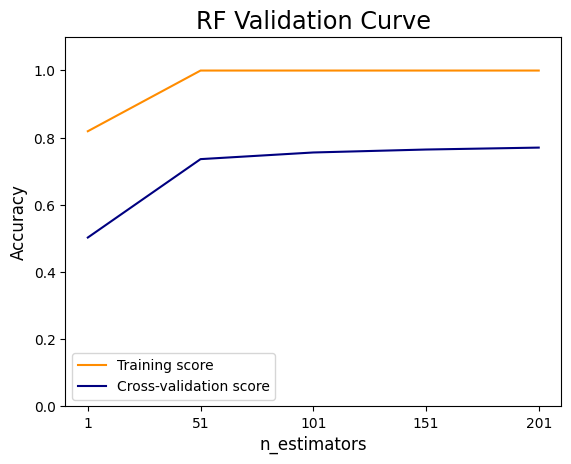

In [50]:
generateCurves("mbti","RF")

  Iterations    Train Accuracy    Test Accuracy
------------  ----------------  ---------------
           1             0.764            0.569
           2             0.659            0.59
           3             0.618            0.541
           4             0.931            0.67
           5             0.815            0.681
           6             0.927            0.723
           7             0.968            0.659
           8             0.965            0.794
           9             0.985            0.769
          10             0.97             0.684
          11             0.988            0.81
          12             0.994            0.79
          13             0.955            0.684
          14             0.986            0.81
          15             0.997            0.798
          16             0.99             0.701
          17             0.994            0.816
          18             0.995            0.781
 


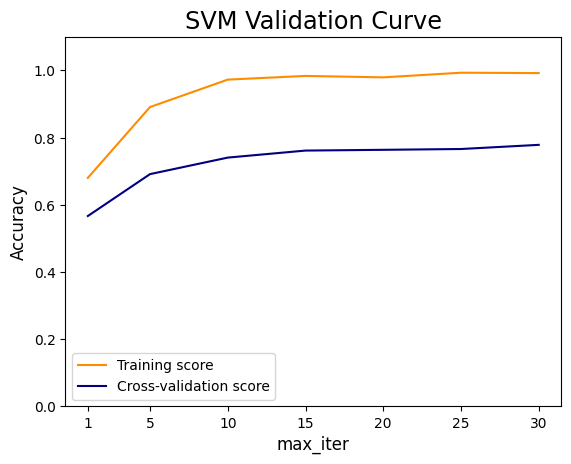

In [88]:
generateCurves("mbti","SVM")

  Neighbors    Train Accuracy    Test Accuracy
-----------  ----------------  ---------------
          1             0.999            0.798
          2             0.999            0.805
          3             0.999            0.809
          4             0.999            0.829
          5             0.999            0.83
          6             0.821            0.698
          7             0.819            0.717
          8             0.808            0.741
          9             0.786            0.772
         10             0.75             0.761
 


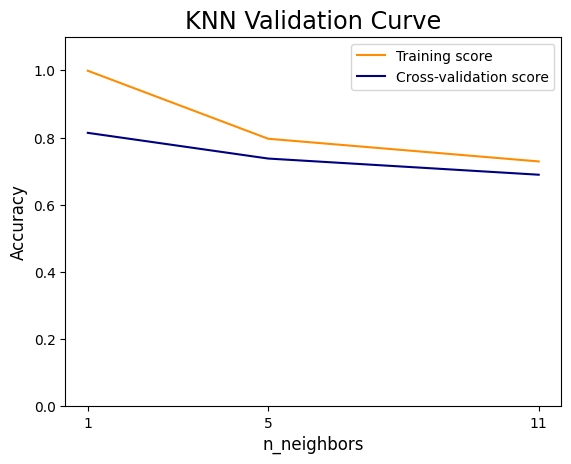

In [69]:
generateCurves("mbti","KNN")